## Folding a time series: pseudocode

Below is a step-by-step description of how folding works.

---

### How to fold a time series for one trial period

**Input:**
- A time series containing signal + noise
- A trial period (how long we *think* one pulse lasts)

**Steps:**
1. Create an empty array called `profile` with a length equal to the trial period  
   (this will store the folded pulse shape)

2. Work out how many full periods fit into the data

3. Go through the data one period at a time:

   a. Start at the beginning of the time series

   b. Take the next group of data points that covers one full trial period

   c. If there are not enough data points left to make a full period:
      - add extra values at the end so that it has the correct length
      - use the average value of the data for these extra points

   d. Add this group of data point-by-point to the `profile`

   e. Move forward by one period and repeat

4. Once all parts of the time series have been added together,
   the `profile` now contains the folded pulse shape.

5. Return the `profile`


The result is a **folded profile** for that trial period.

---

## Searching for a pulsar: pseudocode

We do not know the real pulsar period in advance,
so we must try many different trial periods.

---

### How to search over many periods

**Input:**
- A time series containing signal + noise
- A range of trial periods to test

**Steps:**
1. Create an empty list to store folded profiles

2. For each trial period:
   - Fold the time series using that period
   - Save the folded profile in the list

3. After trying all periods:
   - Look through the folded profiles
   - Find the one that shows a clear pulse

The trial period that produces the strongest pulse
is likely to be the real pulsar period.

---

### Key idea to remember

- If the trial period is **wrong**, the folded profile looks like noise
- If the trial period is **correct**, the pulses line up and a peak appears

This is how astronomers find faint pulsars hidden in noise.


Read over this notebook and the previous one and see if you can implement the folding technique. Below I have given you soem hints.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# let's load the data and stack it together to get as much SNR as possible

n_channels = 8
data = [np.load(f"../Pulsar_search_tutorial_1/data/channel_0{i+1}_telescope_timeseries.npy")[1] for i in range(n_channels)] # index the tuple at [1] to only take the data part, ignoring the time axis

stacked_channels = np.sum(np.array(data).astype(np.float32), axis=0)

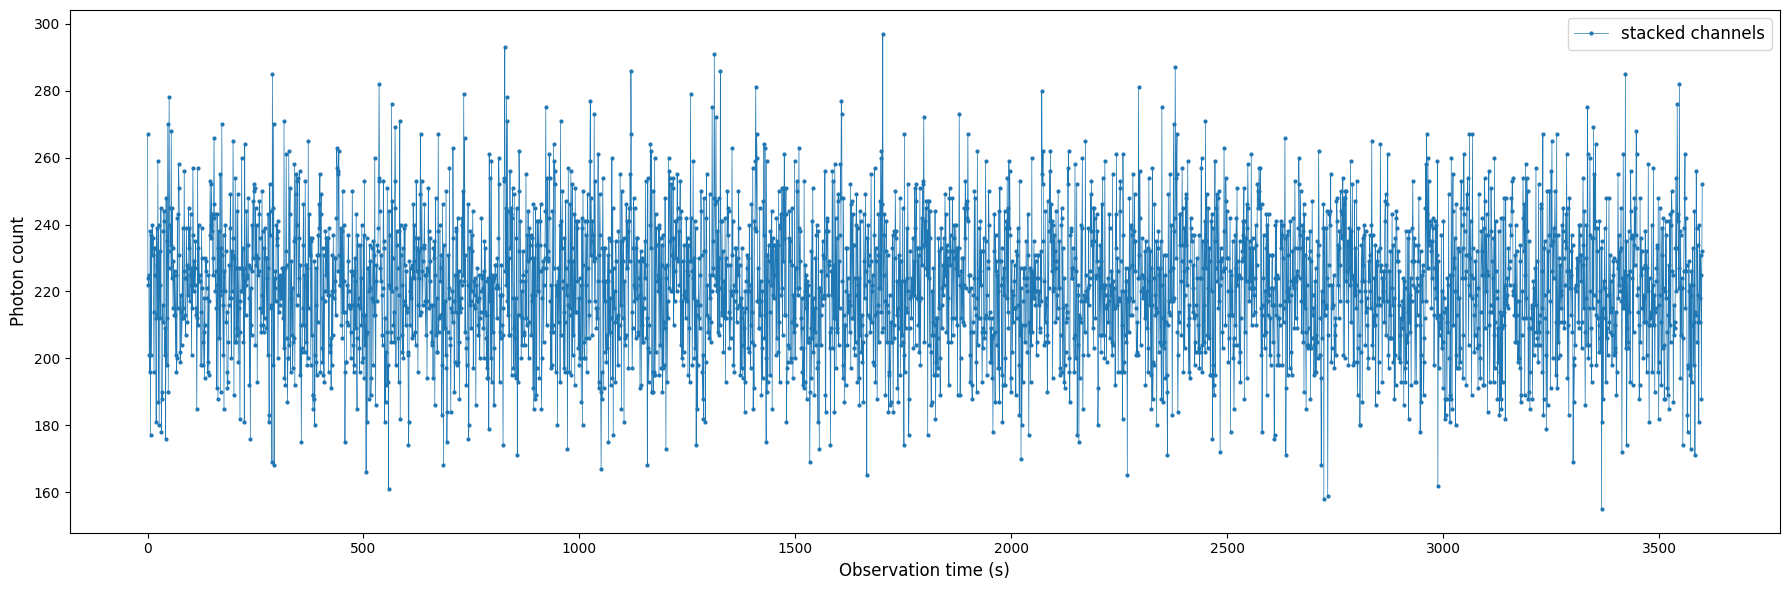

In [5]:
# lets plot the stacked channel

fig, ax = plt.subplots(figsize=(18, 6))
time = np.linspace(0, 3600, 3600)
ax.plot(time, stacked_channels, label='stacked channels', c='C0', ls='-', lw=0.5, marker='o', markersize=2)
ax.legend(fontsize=12, loc=1)
ax.set_xlabel('Observation time (s)', fontsize=12)
ax.set_ylabel('Photon count', fontsize=12)

plt.tight_layout()

At this point, we still cannot see the pulsar by eye.

This means we now need to use our new **folding technique** to search for it.

This is a challenging task.  
You do not need to get everything right — the important part is to **try your best and explore the idea**.

Let’s see if folding can reveal the hidden pulsar.


In [6]:
search_periods = np.arange(40, 400, 1) # these are the periods to search
folded_profiles = [] # add a folded profile for each period here

In [7]:
def stack_profile(period, stacked_channels):
    profile = np.zeros(period)
    n_stacks = int(np.ceil(len(stacked_channels)/period))
    for n in range(n_stacks):
        stack = stacked_channels[n*period: (n+1)*period]
        if len(stack) != period:
            stack = np.pad(stack, (0, period-len(stack)),  mode='constant', constant_values=np.mean(stacked_channels))
        profile += stack
    return profile

In [8]:
for period in search_periods:
    profile = stack_profile(period, stacked_channels)
    folded_profiles.append(profile)

Once you have a list of all the folded profiles, plot them one by one and try to find the pulsar!

In [17]:
def plot_profile(profile):
    phase = np.linspace(0, 1, len(profile)) # for pulse profiles, we like the x-axis to be between 0 and 1, this is called phase

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(phase, profile, 'C0.-') 
    ax.set_xlabel('Phase', fontsize=14)
    ax.set_ylabel('Stacked photon count', fontsize=14)
    

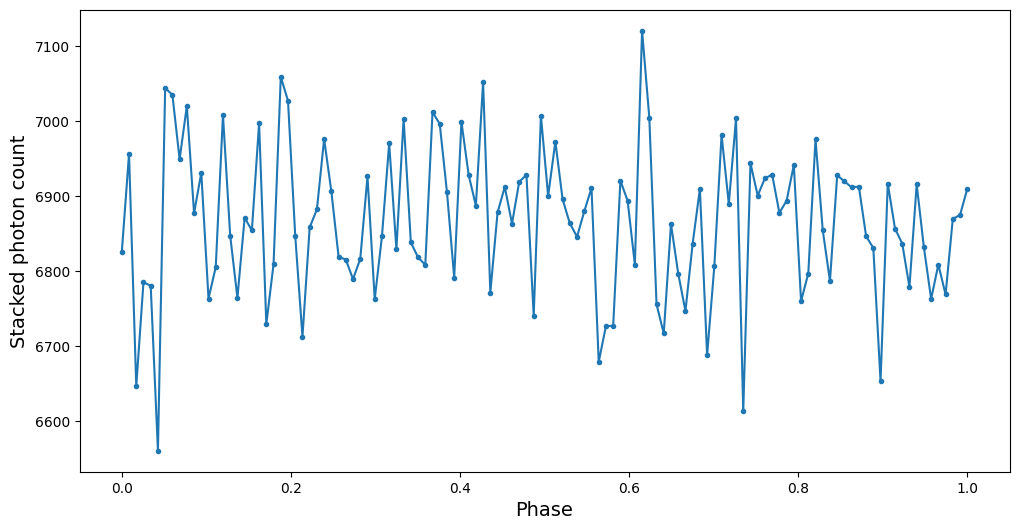

In [18]:
# random period, no pulsar signal
plot_profile(folded_profiles[78])

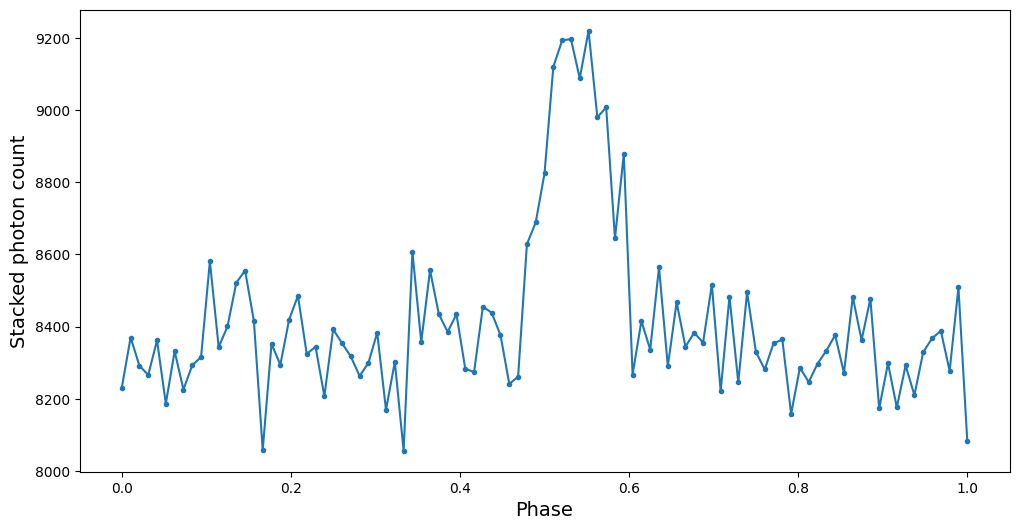

In [19]:
# correct period, pulsar found!
plot_profile(folded_profiles[57])

In [41]:
print(search_periods[57], "s") # pulsar period, s

97


Amazing! You have found the hidden pulsar.